<a href="https://colab.research.google.com/github/ParadoxFlame/C113/blob/main/C113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statistics
import plotly.express as px
 
#Uploading the csv
from google.colab import files
data_to_load = files.upload()
 
#Plotting the graph

 
 


Saving savings_data_final.csv to savings_data_final.csv


ValueError: ignored

In [ ]:
import pandas as pd
import statistics
import plotly.express as px

df = pd.read_csv("savings_data_final.csv")
fig = px.scatter(df, y="quant_saved", color="rem_any")
fig.show()

In [ ]:
import csv

with open('savings_data_final.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

#Finding total number of people and number of people who were reminded
total_entries = len(savings_data)
total_people_given_reminder = 0
for data in savings_data:
  if int(data[3]) == 1:
    total_people_given_reminder += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["Reminded", "Not Reminded"], y=[total_people_given_reminder, (total_entries - total_people_given_reminder)]))

fig.show()

In [ ]:
#Mean, median and mode of savings
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")

Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


In [ ]:
#Mean, median and mode of savings
reminded_savings = []
not_reminded_savings = []
for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Results for people who were reminded to save")
print(f"Mean of savings - {statistics.mean(reminded_savings)}")
print(f"Median of savings - {statistics.median(reminded_savings)}")
print(f"Mode of savings - {statistics.mode(reminded_savings)}")
#To add new lines
print("\n\n")
print("Results for people who were not reminded to save")
print(f"Mean of savings - {statistics.mean(not_reminded_savings)}")
print(f"Median of savings - {statistics.median(not_reminded_savings)}")
print(f"Mode of savings - {statistics.mode(not_reminded_savings)}")

Results for people who were reminded to save
Mean of savings - 82.56940908263547
Median of savings - 39.2724
Mode of savings - 0.0



Results for people who were not reminded to save
Mean of savings - 89.67095185226523
Median of savings - 36.0475
Mode of savings - 0.0


In [ ]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who were reminded -> {statistics.stdev(reminded_savings)}")
print(f"Standard deviation of people who were not reminded -> {statistics.stdev(not_reminded_savings)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who were reminded -> 173.24866414440817
Standard deviation of people who were not reminded -> 228.875050299707


In [ ]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")


Correlation between the age of the person and their savings is - 0.03663447975985462


In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

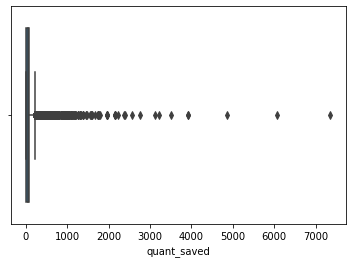

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [ ]:
q1 =df["quant_saved"].quantile(0.25)
q3 =df["quant_saved"].quantile(0.75)
iqr = q3-q1
 
print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")
 
lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr
print(f"Lower Whisker -{lower_whisker}")
print(f"Upper Whisker -{upper_whisker}")
 
 
#Creating a new DataFrame
new_df = df[df["quant_saved"] <upper_whisker]
 
import plotly.figure_factory as ff
all_savings =new_df["quant_saved"].tolist()
 
print(f"Mean of savings -{statistics.mean(all_savings)}")
 
print(f"Median of savings -{statistics.median(all_savings)}")
print(f"Mode of savings -{statistics.mode(all_savings)}")
print(f"Standard deviation in savings -{statistics.stdev(all_savings)}")
fig =ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"],show_hist=False)
fig.show()
 


Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker --124.06099999999998
Upper Whisker -212.85899999999998
Mean of savings -46.200519389818794
Median of savings -36.0475
Mode of savings -0.0
Standard deviation in savings -50.866871917288634


In [ ]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

print(f"Mean of Population -{statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population -46.200519389818794
Mean of Sampling Distribution - 46.32289745223102


In [ ]:
#temp_df will have the rows where age is not 0
import numpy as np
temp_df = new_df[new_df.age != 0]
 
age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()
correlation = np.corrcoef(age,savings)
print(f"Correlation between the age of the person and their savings is -{correlation[0,1]}")
 


Correlation between the age of the person and their savings is -0.08561544120342093


In [ ]:
reminded_df = new_df.loc[new_df["rem_any"] == 1]
not_reminded_df = new_df.loc[new_df["rem_any"] == 0]
 
print(reminded_df.head())
print(not_reminded_df.head())
 
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()
 
 


   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [ ]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 44.05141524357455
Standard Deviation of Sampling (Not Reminded) -> 4.9955889101060675


In [ ]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 39.05582633346849 and First (end) - 49.04700415368062
Second (start) - 34.060237423362416 and Second (end) - 54.04259306378669
Third (start) - 29.06464851325635 and Third (end) - 59.038181973892755


In [ ]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 47.9699802599921
Standard Deviation of Sampling (Reminded) -> 5.162313723038978


In [ ]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")


Z-Score is - 0.7844050194943574
